In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("./data/results.csv")

In [3]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
47593,2024-09-10,Kuwait,Iraq,0,0,FIFA World Cup qualification,Kuwait City,Kuwait,False
47594,2024-09-10,Palestine,Jordan,1,3,FIFA World Cup qualification,Kuala Lumpur,Malaysia,True
47595,2024-09-10,Bahrain,Japan,0,5,FIFA World Cup qualification,Riffa,Bahrain,False
47596,2024-09-10,Indonesia,Australia,0,0,FIFA World Cup qualification,Jakarta,Indonesia,False
47597,2024-09-10,China PR,Saudi Arabia,1,2,FIFA World Cup qualification,Dalian,China PR,False


In [5]:
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
32030,2008-06-15,Mauritius,Cape Verde,0,1,FIFA World Cup qualification,Curepipe,Mauritius,False
32970,2009-06-06,Sweden,Denmark,0,1,FIFA World Cup qualification,Solna,Sweden,False
16794,1989-07-01,Paraguay,Peru,5,2,Copa América,Salvador,Brazil,True
4264,1956-08-09,Yugoslavia,China PR,4,0,Friendly,Belgrade,Yugoslavia,False
10443,1976-03-27,Hungary,Argentina,2,0,Friendly,Budapest,Hungary,False


In [6]:
data.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47598 entries, 0 to 47597
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47598 non-null  object
 1   home_team   47598 non-null  object
 2   away_team   47598 non-null  object
 3   home_score  47598 non-null  int64 
 4   away_score  47598 non-null  int64 
 5   tournament  47598 non-null  object
 6   city        47598 non-null  object
 7   country     47598 non-null  object
 8   neutral     47598 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.nunique().sum()

np.int64(19430)

In [10]:
data.shape

(47598, 9)

In [11]:
# data=data.drop(labels="date",axis=1)
data = data.drop(columns=["date", "city", "country"])


Sagrigate categorical and Numerical features

In [12]:
categorical_columns=data.columns[data.dtypes=="object"]

In [13]:
numerical_columns=data.columns[data.dtypes!="object"]

In [14]:
print(categorical_columns)
cat_data=data[categorical_columns]
cat_data

Index(['home_team', 'away_team', 'tournament'], dtype='object')


,home_team,away_team,tournament
0,Scotland,England,Friendly
1,England,Scotland,Friendly
2,Scotland,England,Friendly
3,England,Scotland,Friendly
4,Scotland,England,Friendly
...,...,...,...
47593,Kuwait,Iraq,FIFA World Cup qualification
47594,Palestine,Jordan,FIFA World Cup qualification
47595,Bahrain,Japan,FIFA World Cup qualification
47596,Indonesia,Australia,FIFA World Cup qualification


In [15]:
print(numerical_columns)
num_data=data[numerical_columns]
num_data


Index(['home_score', 'away_score', 'neutral'], dtype='object')


,home_score,away_score,neutral
0,0,0,False
1,4,2,False
2,2,1,False
3,2,2,False
4,3,0,False
...,...,...,...
47593,0,0,False
47594,1,3,True
47595,0,5,False
47596,0,0,False


In [16]:
data[categorical_columns].describe()

,home_team,away_team,tournament
count,47598,47598,47598
unique,327,321,176
top,Brazil,Uruguay,Friendly
freq,603,573,18009


In [18]:
data[categorical_columns]["home_team"].value_counts()

home_team
Brazil         603
Argentina      593
Mexico         582
South Korea    544
Germany        543
              ... 
Aymara           1
Elba Island      1
West Papua       1
Ticino           1
Hmong            1
Name: count, Length: 327, dtype: int64

In [19]:
data[categorical_columns]["away_team"].value_counts()

away_team
Uruguay          573
Sweden           555
England          534
Hungary          500
Paraguay         484
                ... 
Asturias           1
Central Spain      1
Corsica            1
Cilento            1
Ticino             1
Name: count, Length: 321, dtype: int64

In [20]:
data[categorical_columns]["tournament"].value_counts()

tournament
Friendly                                18009
FIFA World Cup qualification             8200
UEFA Euro qualification                  2824
African Cup of Nations qualification     2171
FIFA World Cup                            964
                                        ...  
The Other Final                             1
Copa Confraternidad                         1
TIFOCO Tournament                           1
ConIFA Challenger Cup                       1
Benedikt Fontana Cup                        1
Name: count, Length: 176, dtype: int64

In [21]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,47598.0,1.758183,1.773368,0.0,1.0,1.0,2.0,31.0
away_score,47598.0,1.182277,1.400769,0.0,0.0,1.0,2.0,21.0


https://www.vrai.com/journal/post/diamond-cut

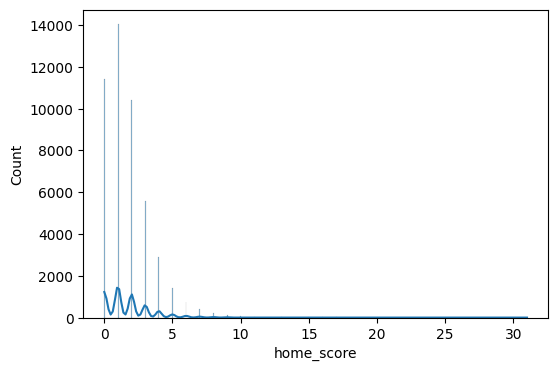

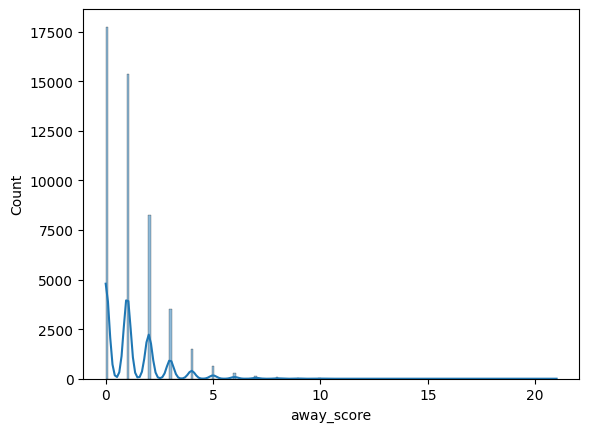

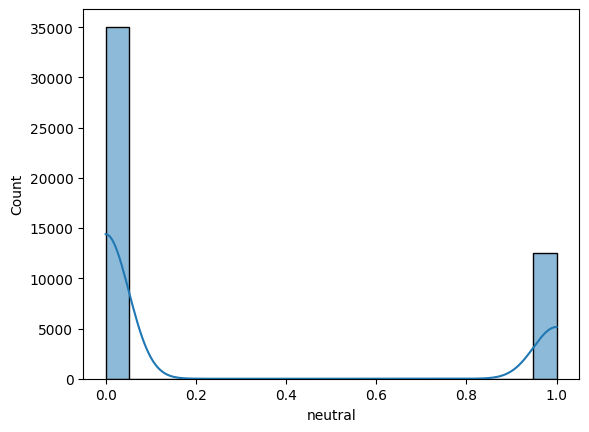

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

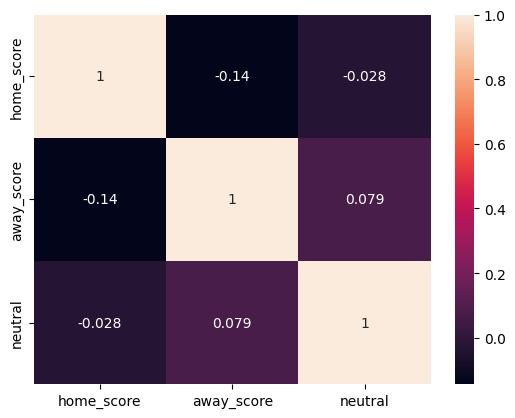

In [23]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [24]:
data[categorical_columns]

,home_team,away_team,tournament
0,Scotland,England,Friendly
1,England,Scotland,Friendly
2,Scotland,England,Friendly
3,England,Scotland,Friendly
4,Scotland,England,Friendly
...,...,...,...
47593,Kuwait,Iraq,FIFA World Cup qualification
47594,Palestine,Jordan,FIFA World Cup qualification
47595,Bahrain,Japan,FIFA World Cup qualification
47596,Indonesia,Australia,FIFA World Cup qualification


In [25]:
data["home_team"].unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Guernsey', 'Jersey', 'Netherlands',
       'Czechoslovakia', 'Alderney', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Catalonia', 'Philippines', 'Basque Country',
       'China PR', 'Brazil', 'Japan', 'Paraguay', 'Canada', 'Estonia',
       'Costa Rica', 'Guatemala', 'Spain', 'Brittany', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Galicia',
       'Portugal', 'Andalusia', 'Australia', 'Lithuania', 'Turkey',
       'Central Spain', 'Mexico', 'Aruba', 'Egypt', 'Republic of Ireland',
       'Haiti', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia', 'Peru',
       'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Trinidad and Tobago', 'Greece', 'Cuba', 'Curaçao',
       'Dominica', 'Silesia', 'Guadeloupe', 'Isra

In [26]:
data["away_team"].unique()

array(['England', 'Scotland', 'Wales', 'Northern Ireland', 'Canada',
       'Argentina', 'Hungary', 'Czechoslovakia', 'Austria', 'Uruguay',
       'France', 'Switzerland', 'Alderney', 'Guernsey', 'Netherlands',
       'Belgium', 'Jersey', 'Germany', 'Norway', 'Sweden', 'Italy',
       'Chile', 'Catalonia', 'Finland', 'Russia', 'China PR',
       'Luxembourg', 'Denmark', 'Brazil', 'Basque Country', 'Philippines',
       'United States', 'Estonia', 'Provence', 'Japan', 'El Salvador',
       'Costa Rica', 'Paraguay', 'Yugoslavia', 'Poland', 'Portugal',
       'Spain', 'Romania', 'Australia', 'Central Spain', 'Mexico',
       'Galicia', 'Brittany', 'Asturias', 'New Zealand', 'Latvia',
       'Guatemala', 'Curaçao', 'Bulgaria', 'Turkey', 'Lithuania', 'Egypt',
       'Republic of Ireland', 'South Africa', 'Jamaica', 'Uganda',
       'Bolivia', 'Haiti', 'Trinidad and Tobago', 'Kenya', 'Ukraine',
       'Honduras', 'Nicaragua', 'Greece', 'Guyana', 'Peru', 'Aruba',
       'Martinique', 'Barbado

In [27]:
data["tournament"].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Muratti Vase', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Far Eastern Championship Games', 'Copa Roca', 'Copa América',
       'Peace Cup', 'Open International Championship',
       'Copa Chevallier Boutell', 'Olympic Games', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'Central American and Caribbean Games', 'FIFA World Cup',
       'Copa Rio Branco', 'FIFA World Cup qualification',
       'Bolivarian Games', 'CCCF Championship', 'NAFC Championship',
       'Copa Oswaldo Cruz', 'Asian Games', 'Pan American Championship',
       'Copa del Pacífico', "Copa Bernardo O'Higgins",
       'AFC Asian Cup qualification', 'Atlantic Cup', 'AFC Asian Cup',
       'African Cup of Nations', 'Copa Paz del Chaco',
       'Merdeka Tournament', 'UEFA Euro qualification',
       'Southeast Asian Peninsular

In [ ]:
home_team_map={'Scotland': 1, 'England': 2, 'Wales': 3, 'Northern Ireland': 4, 'United States': 5, 'Uruguay': 6, 'Austria': 7, 'Hungary': 8, 'Argentina': 9, 'Belgium': 10, 'France': 11, 'Guernsey': 12, 'Jersey': 13, 'Netherlands': 14, 'Czechoslovakia': 15, 'Alderney': 16, 'Switzerland': 17, 'Sweden': 18, 'Germany': 19, 'Italy': 20, 'Chile': 21, 'Norway': 22, 'Finland': 23, 'Luxembourg': 24, 'Russia': 25, 'Denmark': 26, 'Catalonia': 27, 'Philippines': 28, 'Basque Country': 29, 'China PR': 30, 'Brazil': 31, 'Japan': 32, 'Paraguay': 33, 'Canada': 34, 'Estonia': 35, 'Costa Rica': 36, 'Guatemala': 37, 'Spain': 38, 'Brittany': 39, 'Poland': 40, 'Yugoslavia': 41, 'New Zealand': 42, 'Romania': 43, 'Latvia': 44, 'Galicia': 45, 'Portugal': 46, 'Andalusia': 47, 'Australia': 48, 'Lithuania': 49, 'Turkey': 50, 'Central Spain': 51, 'Mexico': 52, 'Aruba': 53, 'Egypt': 54, 'Republic of Ireland': 55, 'Haiti': 56, 'Bulgaria': 57, 'Jamaica': 58, 'Kenya': 59, 'Bolivia': 60, 'Peru': 61, 'Honduras': 62, 'Guyana': 63, 'Uganda': 64, 'Belarus': 65, 'El Salvador': 66, 'Barbados': 67, 'Trinidad and Tobago': 68, 'Greece': 69, 'Cuba': 70, 'Curaçao': 71, 'Dominica': 72, 'Silesia': 73, 'Guadeloupe': 74, 'Israel': 75, 'Suriname': 76, 'French Guiana': 77, 'Panama': 78, 'Colombia': 79, 'Venezuela': 80, 'Ecuador': 81, 'Saint Kitts and Nevis': 82, 'Slovakia': 83, 'Manchukuo': 84, 'Croatia': 85, 'Nicaragua': 86, 'Afghanistan': 87, 'India': 88, 'Martinique': 89, 'Zimbabwe': 90, 'Iceland': 91, 'Albania': 92, 'Madagascar': 93, 'Zambia': 94, 'Mauritius': 95, 'Tanzania': 96, 'Iran': 97, 'Djibouti': 98, 'DR Congo': 99, 'Vietnam': 100, 'Macau': 101, 'Ethiopia': 102, 'Puerto Rico': 103, 'Réunion': 104, 'Sierra Leone': 105, 'Zanzibar': 106, 'South Korea': 107, 'Ghana': 108, 'South Africa': 109, 'New Caledonia': 110, 'Fiji': 111, 'Nigeria': 112, 'Myanmar': 113, 'Sri Lanka': 114, 'Tahiti': 115, 'Gambia': 116, 'Hong Kong': 117, 'Singapore': 118, 'Malaysia': 119, 'Indonesia': 120, 'Guinea-Bissau': 121, 'German DR': 122, 'Vanuatu': 123, 'Kernow': 124, 'Saarland': 125, 'Taiwan': 126, 'Burma': 127, 'Cambodia': 128, 'Lebanon': 129, 'Pakistan': 130, 'Vietnam Republic': 131, 'North Korea': 132, 'Togo': 133, 'Sudan': 134, 'Malta': 135, 'Syria': 136, 'Tunisia': 137, 'Malawi': 138, 'Morocco': 139, 'Malaya': 140, 'Benin': 141, 'Thailand': 142, 'Cameroon': 143, 'Central African Republic': 144, 'Gabon': 145, 'Ivory Coast': 146, 'Burkina Faso': 147, 'Congo': 148, 'Mali': 149, 'North Vietnam': 150, 'Mongolia': 151, 'Cyprus': 152, 'Iraq': 153, 'Saint Lucia': 154, 'Grenada': 155, 'Senegal': 156, 'Chad': 157, 'Libya': 158, 'Guinea': 159, 'Algeria': 160, 'Kuwait': 161, 'Jordan': 162, 'Liberia': 163, 'Solomon Islands': 164, 'Laos': 165, 'Saint Vincent and the Grenadines': 166, 'Bermuda': 167, 'Niger': 168, 'Montenegro': 169, 'Palestine': 170, 'Bahrain': 171, 'Papua New Guinea': 172, 'Mauritania': 173, 'Saudi Arabia': 174, 'Eswatini': 175, 'Western Australia': 176, 'Somalia': 177, 'Lesotho': 178, 'Cook Islands': 179, 'Qatar': 180, 'Antigua and Barbuda': 181, 'Faroe Islands': 182, 'Bangladesh': 183, 'Yemen': 184, 'Oman': 185, 'Yemen DPR': 186, 'Burundi': 187, 'Mozambique': 188, 'Guam': 189, 'Angola': 190, 'Dominican Republic': 191, 'Seychelles': 192, 'Rwanda': 193, 'São Tomé and Príncipe': 194, 'Botswana': 195, 'Northern Cyprus': 196, 'Cape Verde': 197, 'Kyrgyzstan': 198, 'Georgia': 199, 'Azerbaijan': 200, 'Comoros': 201, 'Kiribati': 202, 'Tonga': 203, 'Wallis Islands and Futuna': 204, 'United Arab Emirates': 205, 'Brunei': 206, 'Equatorial Guinea': 207, 'Liechtenstein': 208, 'Nepal': 209, 'Greenland': 210, 'Niue': 211, 'Samoa': 212, 'American Samoa': 213, 'Belize': 214, 'Maldives': 215, 'Anguilla': 216, 'Cayman Islands': 217, 'Palau': 218, 'Sint Maarten': 219, 'Namibia': 220, 'Åland Islands': 221, 'Ynys Môn': 222, 'Saint Martin': 223, 'San Marino': 224, 'Slovenia': 225, 'Shetland': 226, 'Isle of Wight': 227, 'Moldova': 228, 'Ukraine': 229, 'Kazakhstan': 230, 'Tajikistan': 231, 'Uzbekistan': 232, 'Turkmenistan': 233, 'Armenia': 234, 'Czech Republic': 235, 'Gibraltar': 236, 'Isle of Man': 237, 'North Macedonia': 238, 'Montserrat': 239, 'Serbia': 240, 'Canary Islands': 241, 'Bosnia and Herzegovina': 242, 'Vatican City': 243, 'Kosovo': 244
}

In [ ]:
away_team_map={}

In [ ]:
tournament_map={}

In [28]:
data["home_team"]=data["home_team"].map(home_team_map)
data["away_team"]=data["away_team"].map(away_team_map)
data["tournament"]=data["tournament"].map(tournament_map)

In [29]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
cut,193573.0,4.132152,0.994157,1.0,3.00,4.00,5.00,5.00
color,193573.0,3.516157,1.623091,1.0,2.00,4.00,5.00,7.00
clarity,193573.0,3.975084,1.501776,1.0,3.00,4.00,5.00,8.00
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [1]:
import pandas as pd

# Example DataFrame with country names
data = {
    'Country': ['Scotland', 'England', 'Wales', 'Northern Ireland', 'United States', 'Uruguay', 'Austria',
 'Hungary', 'Argentina', 'Belgium', 'France', 'Guernsey', 'Jersey', 'Netherlands',
 'Czechoslovakia', 'Alderney', 'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile',
 'Norway', 'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia', 'Philippines',
 'Basque Country', 'China PR', 'Brazil', 'Japan', 'Paraguay', 'Canada', 'Estonia',
 'Costa Rica', 'Guatemala', 'Spain', 'Brittany', 'Poland', 'Yugoslavia', 'New Zealand',
 'Romania', 'Latvia', 'Galicia', 'Portugal', 'Andalusia', 'Australia', 'Lithuania',
 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt', 'Republic of Ireland', 'Haiti',
 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia', 'Peru', 'Honduras', 'Guyana', 'Uganda',
 'Belarus', 'El Salvador', 'Barbados', 'Trinidad and Tobago', 'Greece', 'Cuba', 'Curaçao',
 'Dominica', 'Silesia', 'Guadeloupe', 'Israel', 'Suriname', 'French Guiana', 'Panama',
 'Colombia', 'Venezuela', 'Ecuador', 'Saint Kitts and Nevis', 'Slovakia', 'Manchukuo',
 'Croatia', 'Nicaragua', 'Afghanistan', 'India', 'Martinique', 'Zimbabwe', 'Iceland',
 'Albania', 'Madagascar', 'Zambia', 'Mauritius', 'Tanzania', 'Iran', 'Djibouti', 'DR Congo',
 'Vietnam', 'Macau', 'Ethiopia', 'Puerto Rico', 'Réunion', 'Sierra Leone', 'Zanzibar',
 'South Korea', 'Ghana', 'South Africa', 'New Caledonia', 'Fiji', 'Nigeria', 'Myanmar',
 'Sri Lanka', 'Tahiti', 'Gambia', 'Hong Kong', 'Singapore', 'Malaysia', 'Indonesia',
 'Guinea-Bissau', 'German DR', 'Vanuatu', 'Kernow', 'Saarland', 'Taiwan', 'Burma',
 'Cambodia', 'Lebanon', 'Pakistan', 'Vietnam Republic', 'North Korea', 'Togo', 'Sudan',
 'Malta', 'Syria', 'Tunisia', 'Malawi', 'Morocco', 'Malaya', 'Benin', 'Thailand', 'Cameroon',
 'Central African Republic', 'Gabon', 'Ivory Coast', 'Burkina Faso', 'Congo', 'Mali',
 'North Vietnam', 'Mongolia', 'Cyprus', 'Iraq', 'Saint Lucia', 'Grenada', 'Senegal', 'Chad',
 'Libya', 'Guinea', 'Algeria', 'Kuwait', 'Jordan', 'Liberia', 'Solomon Islands', 'Laos',
 'Saint Vincent and the Grenadines', 'Bermuda', 'Niger', 'Montenegro', 'Palestine', 'Bahrain',
 'Papua New Guinea', 'Mauritania', 'Saudi Arabia', 'Eswatini', 'Western Australia', 'Somalia',
 'Lesotho', 'Cook Islands', 'Qatar', 'Antigua and Barbuda', 'Faroe Islands', 'Bangladesh',
 'Yemen', 'Oman', 'Yemen DPR', 'Burundi', 'Mozambique', 'Guam', 'Angola', 'Dominican Republic',
 'Seychelles', 'Rwanda', 'São Tomé and Príncipe', 'Botswana', 'Northern Cyprus', 'Cape Verde',
 'Kyrgyzstan', 'Georgia', 'Azerbaijan', 'Comoros', 'Kiribati', 'Tonga', 'Wallis Islands and Futuna',
 'United Arab Emirates', 'Brunei', 'Equatorial Guinea', 'Liechtenstein', 'Nepal', 'Greenland',
 'Niue', 'Samoa', 'American Samoa', 'Belize', 'Maldives', 'Anguilla', 'Cayman Islands',
 'Palau', 'Sint Maarten', 'Namibia', 'Åland Islands', 'Ynys Môn', 'Saint Martin', 'San Marino',
 'Slovenia', 'Shetland', 'Isle of Wight', 'Moldova', 'Ukraine', 'Kazakhstan', 'Tajikistan',
 'Uzbekistan', 'Turkmenistan', 'Armenia', 'Czech Republic', 'Gibraltar', 'Isle of Man',
 'North Macedonia', 'Montserrat', 'Serbia', 'Canary Islands', 'Bosnia and Herzegovina',
 'Andorra', 'British Virgin Islands', 'Frøya', 'Hitra', 'United States Virgin Islands',
 'Corsica', 'Eritrea', 'Bahamas', 'Gotland', 'Saare County', 'Rhodes', 'Micronesia',
 'Bhutan', 'Orkney', 'Monaco', 'Tuvalu', 'Sark', 'Mayotte', 'Turks and Caicos Islands',
 'Timor-Leste', 'Occitania', 'Chechnya', 'Western Isles', 'Falkland Islands', 'Kosovo',
 'Republic of St. Pauli', 'Găgăuzia', 'Tibet', 'Sápmi', 'Northern Mariana Islands',
 'Romani people', 'Menorca', 'Provence', 'Arameans Suryoye', 'Padania', 'Iraqi Kurdistan',
 'Gozo', 'Bonaire', 'Chagos Islands', 'Sealand', 'Western Sahara', 'Raetia', 'Darfur',
 'Tamil Eelam', 'South Sudan', 'Saint Barthélemy', 'Abkhazia', 'Saint Pierre and Miquelon',
 'Artsakh', 'Madrid', 'Saugeais', 'Ellan Vannin', 'Vatican City', 'Somaliland', 'Franconia',
 'South Ossetia', 'County of Nice', 'Seborga', 'Székely Land', 'Panjab', 'Felvidék',
 'Luhansk PR', 'Donetsk PR', 'United Koreans in Japan', 'Western Armenia', 'Délvidék',
 'Barawa', 'Ryūkyū', 'Kárpátalja', 'Yorkshire', 'Matabeleland', 'Cascadia', 'Kabylia',
 'Parishes of Jersey', 'Chameria', 'Saint Helena', 'East Timor', 'Yoruba Nation', 'Biafra',
 'Mapuche', 'Aymara', 'Elba Island', 'West Papua', 'Ticino', 'Hmong']

}
df = pd.DataFrame(data)

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)

print(df_encoded)


     Country_Afghanistan  Country_Albania  Country_Alderney  Country_Algeria  \
0                  False            False             False            False   
1                  False            False             False            False   
2                  False            False             False            False   
3                  False            False             False            False   
4                  False            False             False            False   
..                   ...              ...               ...              ...   
322                False            False             False            False   
323                False            False             False            False   
324                False            False             False            False   
325                False            False             False            False   
326                False            False             False            False   

     Country_American Samoa  Country_An